In [ ]:
# Import necessary library
import pandas as pd

# Reload the data from the CSV file
data = pd.read_csv("volatility_bloom_norm.csv")

Saving volatility_bloom_norm.csv to volatility_bloom_norm.csv


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# Selecting the specified features and target
features = ['ENVIRON_DISCLOSURE_SCORE', 'SOCIAL_DISCLOSURE_SCORE', 'GOVNCE_DISCLOSURE_SCORE', 'ESG_DISCLOSURE_SCORE']
target = 'EBITDA_VOLATILITY'

X = data[features].values
y = data[target].values

# Reshape input data for LSTM [samples, time steps, features]
X_reshaped = np.reshape(X, (X.shape[0], 1, X.shape[1]))

# Hyperparameters to iterate over
epochs_options = [50, 100]
batch_size_options = [10, 20]
optimizer_options = ['Adam', 'RMSprop']
neurons_options = [50, 100]
dropout_rate_options = [0.2, 0.3]

# Function to create the LSTM model
def create_lstm_model(optimizer, neurons, dropout_rate):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(1, X_reshaped.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer for regression
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Manual grid search
best_score = float('inf')
best_params = {}
for epochs in epochs_options:
    for batch_size in batch_size_options:
        for optimizer in optimizer_options:
            for neurons in neurons_options:
                for dropout_rate in dropout_rate_options:
                    model = create_lstm_model(optimizer, neurons, dropout_rate)
                    model.fit(X_reshaped, y, epochs=epochs, batch_size=batch_size, verbose=0)
                    predictions = model.predict(X_reshaped)
                    score = mean_squared_error(y, predictions)

                    if score < best_score:
                        best_score = score
                        best_params = {
                            'epochs': epochs,
                            'batch_size': batch_size,
                            'optimizer': optimizer,
                            'neurons': neurons,
                            'dropout_rate': dropout_rate
                        }
                        print(f'New best score: {best_score} with parameters: {best_params}')

# Print best parameters
print("Best parameters found:", best_params)


53/53 [==============================] - 1s 2ms/step
New best score: 0.43735277976167153 with parameters: {'epochs': 50, 'batch_size': 10, 'optimizer': 'Adam', 'neurons': 50, 'dropout_rate': 0.2}
53/53 [==============================] - 0s 2ms/step
New best score: 0.437299564949471 with parameters: {'epochs': 50, 'batch_size': 10, 'optimizer': 'Adam', 'neurons': 100, 'dropout_rate': 0.2}
53/53 [==============================] - 1s 3ms/step
New best score: 0.4372647676317671 with parameters: {'epochs': 50, 'batch_size': 20, 'optimizer': 'Adam', 'neurons': 50, 'dropout_rate': 0.2}
53/53 [==============================] - 0s 2ms/step
New best score: 0.43720367450585423 with parameters: {'epochs': 100, 'batch_size': 20, 'optimizer': 'Adam', 'neurons': 50, 'dropout_rate': 0.2}
53/53 [==============================] - 0s 2ms/step
Best parameters found: {'epochs': 100, 'batch_size': 20, 'optimizer': 'Adam', 'neurons': 50, 'dropout_rate': 0.2}


In [ ]:
# Reshape input data for LSTM [samples, time steps, features]
X_reshaped = np.reshape(X, (X.shape[0], 1, X.shape[1]))

# Function to create the LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, X_reshaped.shape[2])))  # 50 neurons
    model.add(Dropout(0.2))  # Dropout rate of 0.2
    model.add(Dense(1))  # Output layer for regression
    model.compile(loss='mean_squared_error', optimizer='Adam')  # Using Adam optimizer
    return model

# Create and train the model
model = create_lstm_model()
model.fit(X_reshaped, y, epochs=100, batch_size=20, verbose=1)  # Training with specified parameters


Epoch 1/100
84/84 [==============================] - 2s 4ms/step - loss: 0.4528
Epoch 2/100
84/84 [==============================] - 0s 4ms/step - loss: 0.4435
Epoch 3/100
84/84 [==============================] - 0s 4ms/step - loss: 0.4419
Epoch 4/100
84/84 [==============================] - 0s 4ms/step - loss: 0.4420
Epoch 5/100
84/84 [==============================] - 0s 4ms/step - loss: 0.4403
Epoch 6/100
84/84 [==============================] - 0s 4ms/step - loss: 0.4397
Epoch 7/100
84/84 [==============================] - 0s 4ms/step - loss: 0.4406
Epoch 8/100
84/84 [==============================] - 0s 5ms/step - loss: 0.4382
Epoch 9/100
84/84 [==============================] - 0s 4ms/step - loss: 0.4402
Epoch 10/100
84/84 [==============================] - 0s 4ms/step - loss: 0.4392
Epoch 11/100
84/84 [==============================] - 0s 4ms/step - loss: 0.4391
Epoch 12/100
84/84 [==============================] - 0s 4ms/step - loss: 0.4390
Epoch 13/100
84/84 [=================

In [ ]:
# Save the model
model.save('lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('lstm_model.h5')

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error

# Load the new dataset
new_data = pd.read_csv('volatility_SME_bloom_norm.csv')

# Selecting the features and the target
features = ['ENVIRON_DISCLOSURE_SCORE', 'SOCIAL_DISCLOSURE_SCORE', 'GOVNCE_DISCLOSURE_SCORE', 'ESG_DISCLOSURE_SCORE']
target = 'EBITDA_VOLATILITY'

new_X = new_data[features].values
new_y = new_data[target].values  # This line defines new_y

# Reshape input data for LSTM [samples, time steps, features]
new_X_reshaped = np.reshape(new_X, (new_X.shape[0], 1, new_X.shape[1]))

# Load the saved model
loaded_model = load_model('lstm_model.h5')

# Use the loaded model to make predictions
new_predictions = loaded_model.predict(new_X_reshaped)

# Calculate Mean Absolute Error
new_mae = mean_absolute_error(new_y, new_predictions)
print("Mean Absolute Error on new data:", new_mae)


2/2 [==============================] - 0s 7ms/step
Mean Absolute Error on new data: 0.09061601206747975


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Mean Squared Error (MSE)
mse = mean_squared_error(new_y, new_predictions)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 0.014175202768339
Root Mean Squared Error (RMSE): 0.11905966054184347


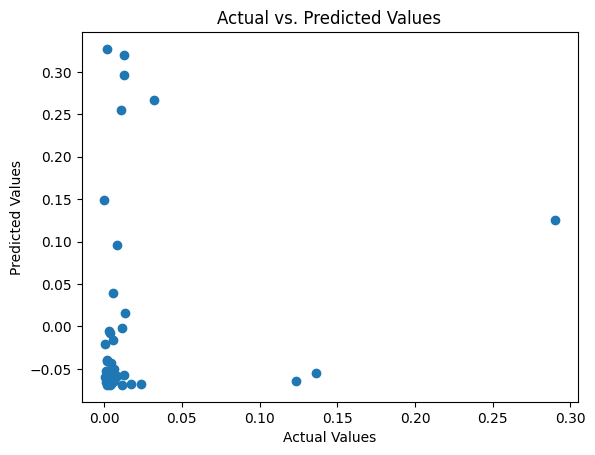

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(new_y, new_predictions)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


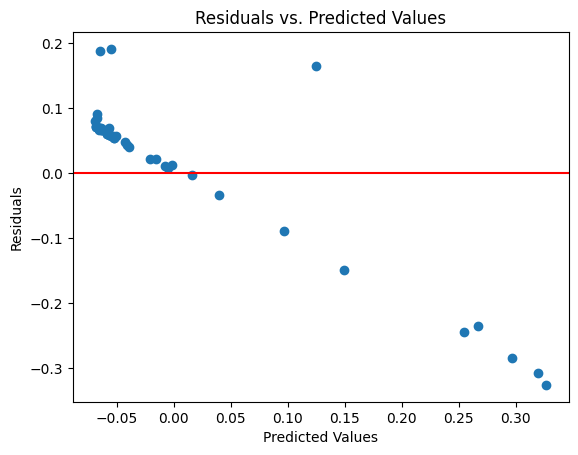

In [ ]:
residuals = new_y - new_predictions.flatten()

plt.scatter(new_predictions, residuals)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


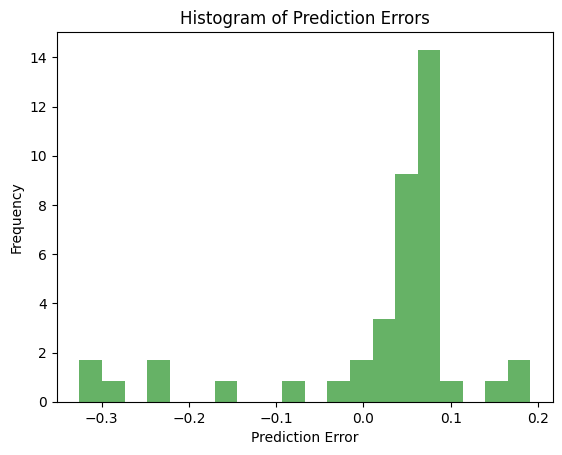

In [ ]:
plt.hist(residuals, bins=20, density=True, alpha=0.6, color='g')
plt.title('Histogram of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()


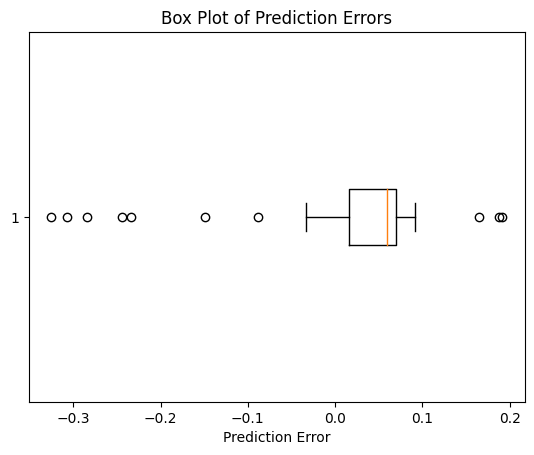

In [ ]:
plt.boxplot(residuals, vert=False)
plt.title('Box Plot of Prediction Errors')
plt.xlabel('Prediction Error')
plt.show()


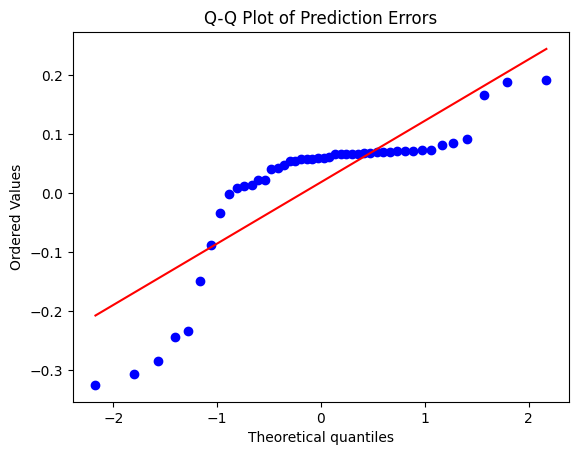

In [ ]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Prediction Errors')
plt.show()


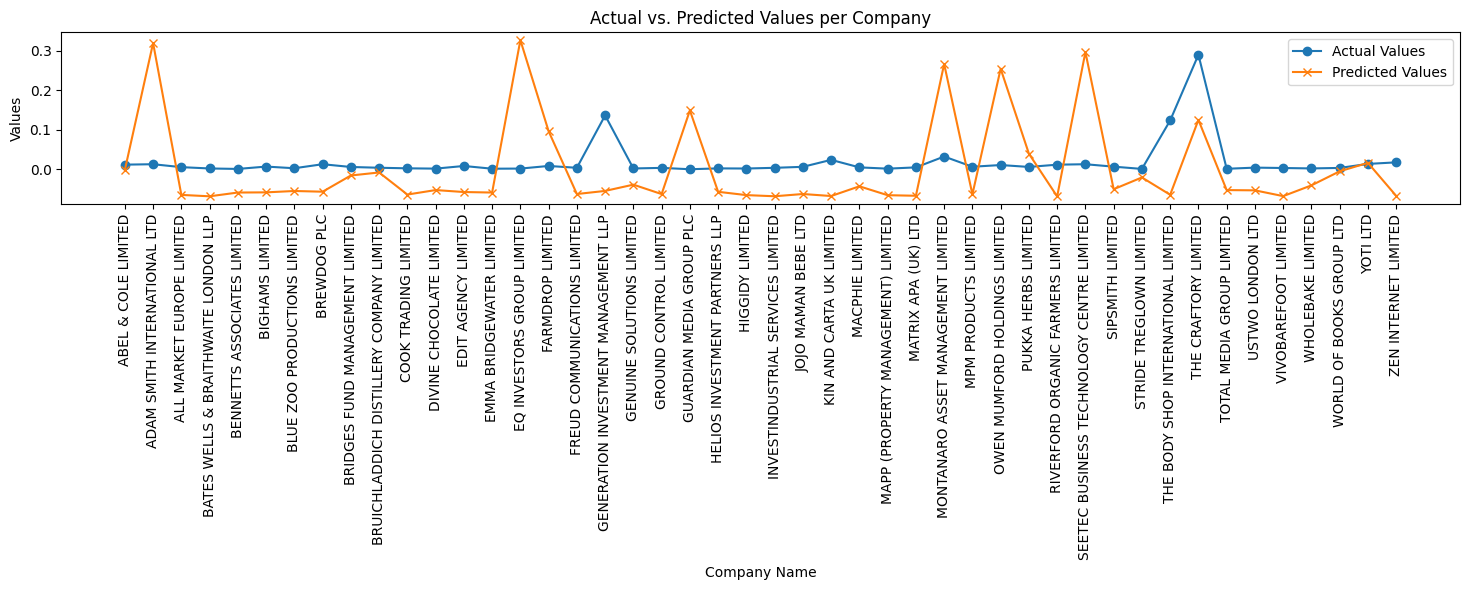

In [ ]:
import matplotlib.pyplot as plt


company_names = new_data['Company name']

plt.figure(figsize=(15, 6))
plt.plot(company_names, new_y, label='Actual Values', marker='o')
plt.plot(company_names, new_predictions, label='Predicted Values', marker='x')
plt.xticks(rotation=90)
plt.title('Actual vs. Predicted Values per Company')
plt.xlabel('Company Name')
plt.ylabel('Values')
plt.legend()
plt.tight_layout()
plt.show()
